Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)

---


In this notebook, we will perform principal component analysis on the central valley dataset. 

**Expected learning outcomes**:   
 
*   Learn how to explain PCA results
*   Learn how to use PCA to perform dimension reduction




In [1]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
# Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 369 (delta 83), reused 116 (delta 48), pack-reused 203
Receiving objects: 100% (369/369), 48.63 MiB | 23.89 MiB/s, done.
Resolving deltas: 100% (169/169), done.


In [3]:
# Load geochem dataset, groundwater chemistry in Central Valley
data = pd.read_csv('/content/DataScienceForGeosciences/Ch2_StatsGeochem/Datapoints-CentralValley-Groundwater-Jan2019.csv')

Four-variate compositional dataset: Cr, As, Mn, NO3 

In [4]:
X = np.c_[np.log(data['Cr (ppb)']/data['Mg (ppb)']), 
          np.log(data['As (ppb)']/data['Mg (ppb)']), 
          np.log(data['Mn (ppb)']/data['Mg (ppb)']),
          np.log(data['NO3 (ppb)']/data['Mg (ppb)'])]

# Run PCA code

In [5]:
## Run PCA
n_pcs = 4
pca = PCA(n_components=n_pcs)
pca.fit(X)
X_pc = pca.transform(X)

Variance of $v_i$

In [6]:
np.round(pca.explained_variance_,2)

array([10.82,  7.71,  1.57,  0.89])

Variance of $x_i$

In [7]:
np.round(np.var(X,axis = 0),2)

array([3.14, 4.58, 8.41, 4.83])

# Plot 1: Scree plot




In [8]:
matplotlib.rcParams.update({'font.size': 18})

Text(0.5, 1.0, 'Scree plot: absolute variance')

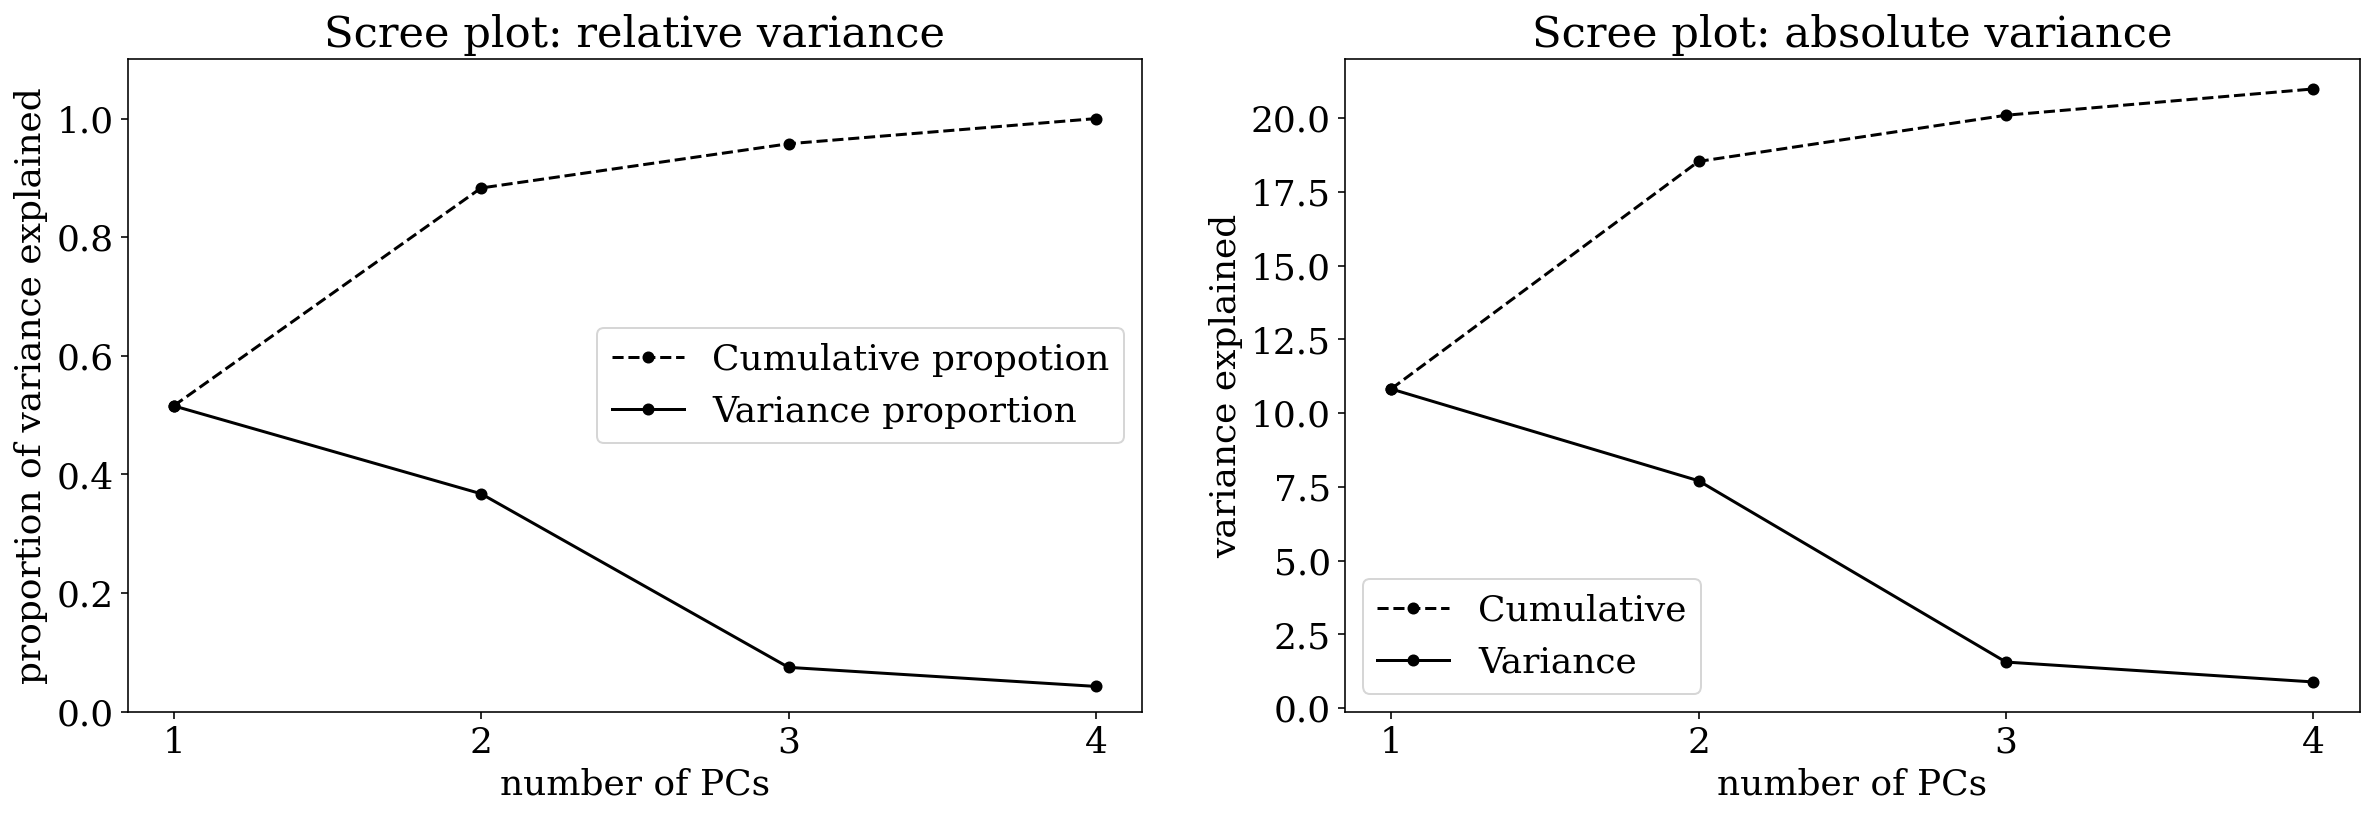

In [9]:
matplotlib.rc("figure", figsize=(20,6))
ax = plt.subplot(1, 2, 1)

plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), \
          marker='o', markersize=5, linestyle = 'dashed', color='k', label='Cumulative propotion')
plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_ratio_, \
          marker='o', markersize=5, color='k', label='Variance proportion')
plt.xlabel('number of PCs')
plt.ylabel('proportion of variance explained')
plt.xticks(np.arange(1,X.shape[1]+1,1))
plt.ylim(0,1.1)
plt.legend()
plt.title('Scree plot: relative variance')

ax = plt.subplot(1, 2, 2)
plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_.cumsum(), \
          marker='o', markersize=5, linestyle = 'dashed', color='k', label='Cumulative')
plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_, \
          marker='o', markersize=5, color='k', label='Variance')
plt.xlabel('number of PCs')
plt.ylabel('variance explained')
plt.xticks(np.arange(1,X.shape[1]+1,1))
plt.legend()
plt.title('Scree plot: absolute variance')


# Plot 2: Loadings plot

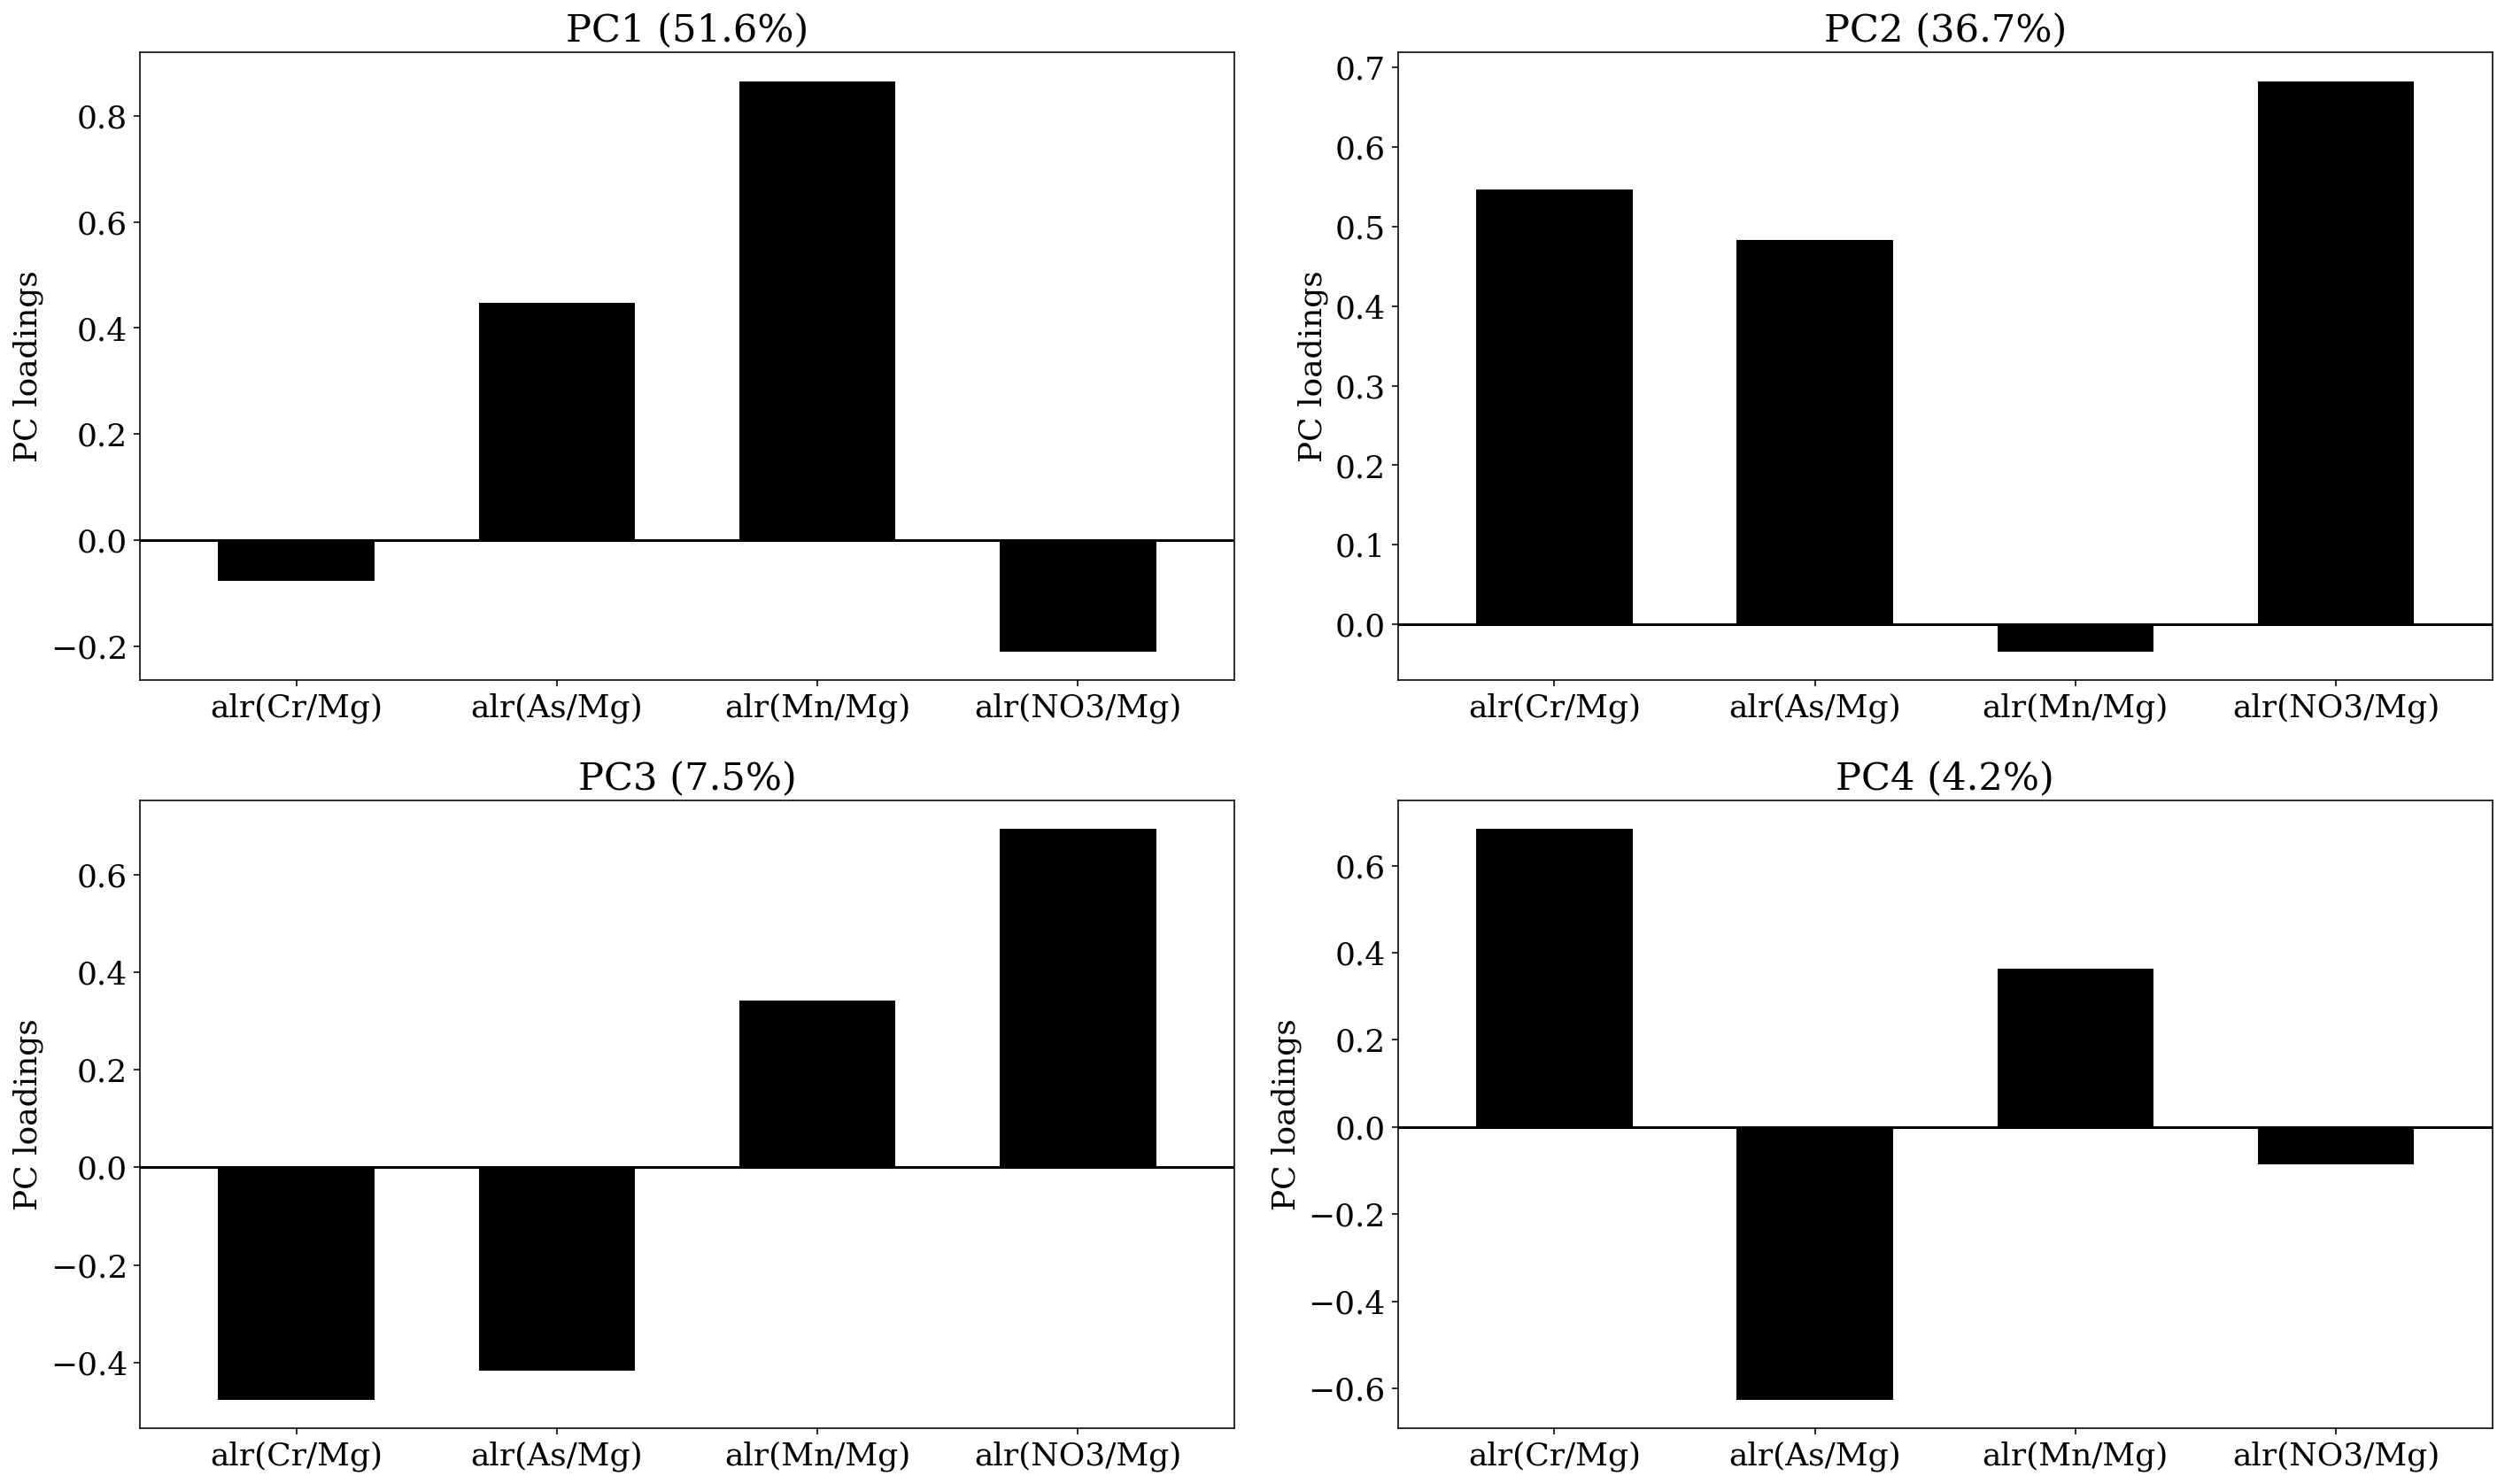

In [10]:
plt.figure(figsize=(20,12))
for i in range(n_pcs):
  plt.subplot(2,2,i+1)
  plt.bar(['alr(Cr/Mg)', 'alr(As/Mg)', 'alr(Mn/Mg)',  'alr(NO3/Mg)'], 
          pca.components_[i], color = 'k', linewidth=0.5, width=0.6)
  plt.hlines(y=0, xmin=-1, xmax=3.6 )
  plt.ylabel('PC loadings')
  plt.title('PC'+str(i+1)+' ({:.1f}%)'.format(100*pca.explained_variance_ratio_[i]))
  plt.xlim(-0.6,3.6)
plt.tight_layout()

# Plot 3: Score plots


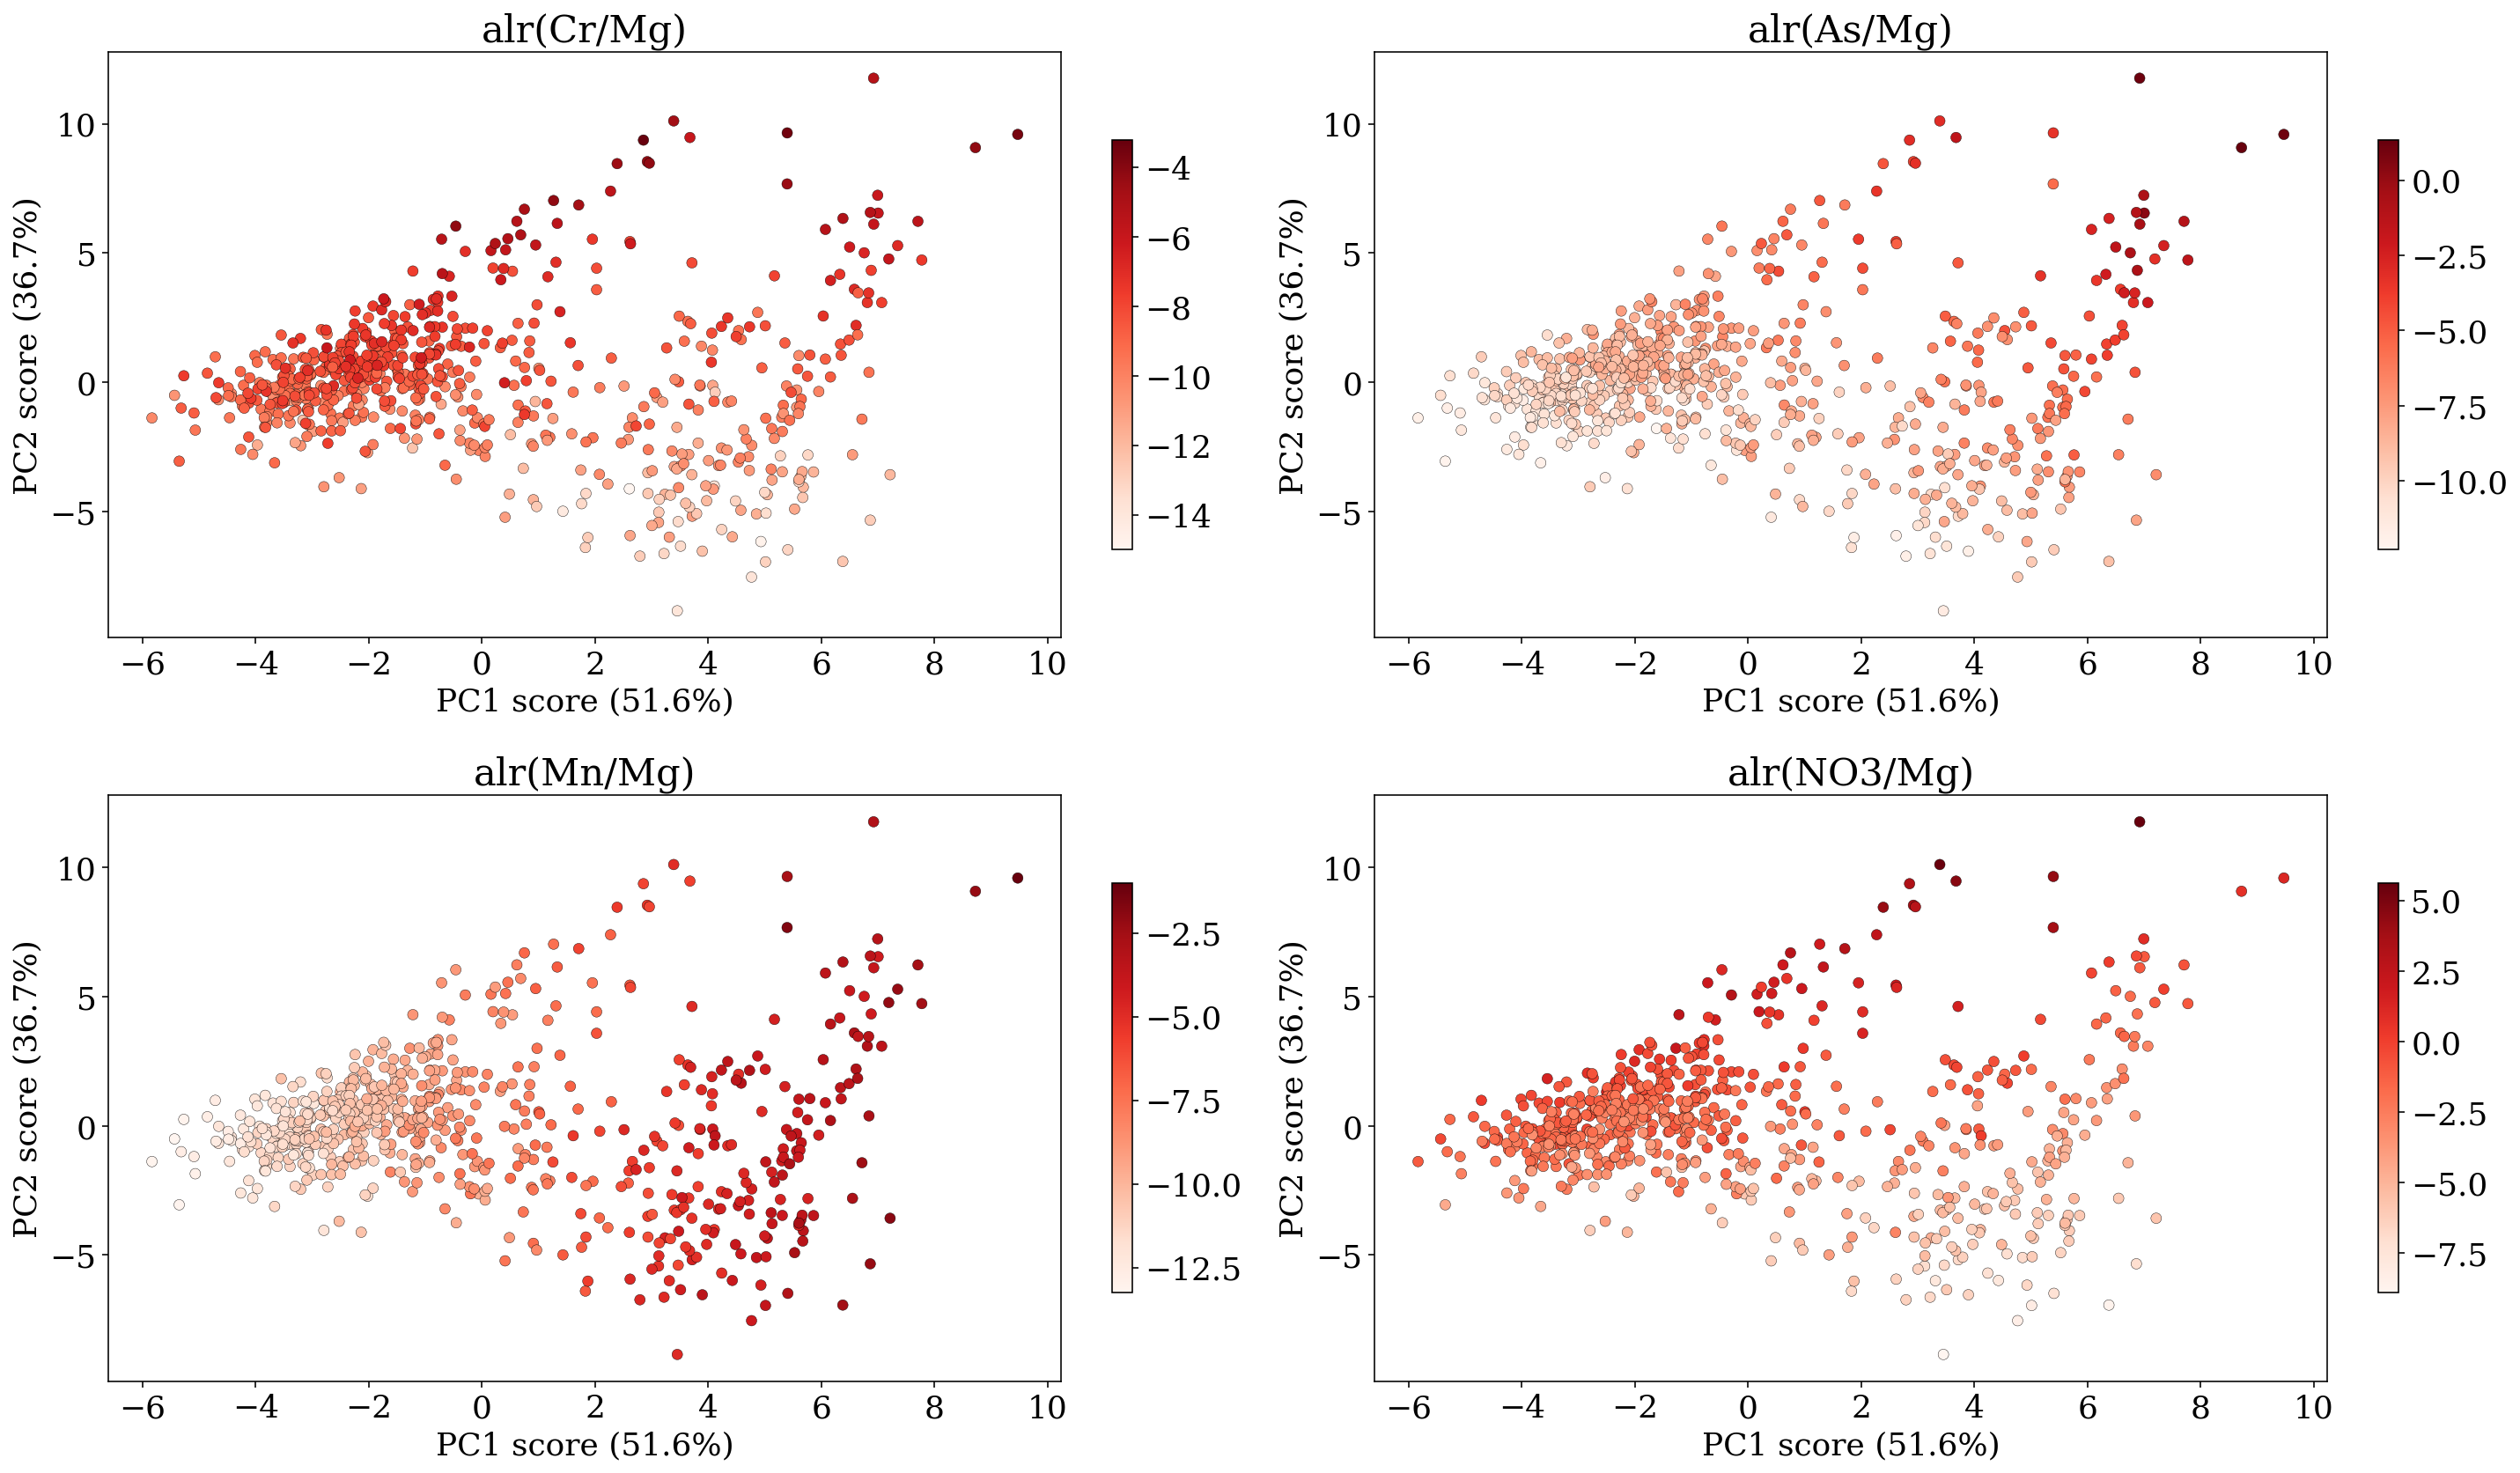

In [11]:
geochem = ['Cr (ppb)', 'As (ppb)', 'Mn (ppb)', 'NO3 (ppb)' ]
alr_name= ['alr(Cr/Mg)', 'alr(As/Mg)', 'alr(Mn/Mg)', 'alr(NO3/Mg)']

plt.figure(figsize=(20,12))
for i in range(n_pcs):
  plt.subplot(2, 2, i+1)
  plt.scatter(X_pc[:,0], X_pc[:,1],  c=np.log(data[geochem[i]]/data['Mg (ppb)']), 
              cmap = 'Reds', edgecolor='k', linewidth=0.2)

  plt.colorbar(fraction=0.02)
  plt.ylabel('PC2 score ({:.1f}%)'.format(100*pca.explained_variance_ratio_[1]))
  plt.xlabel('PC1 score ({:.1f}%)'.format(100*pca.explained_variance_ratio_[0]))

  plt.title(alr_name[i])
plt.tight_layout()

# Plot 4: For spatial data: maps with pc scores


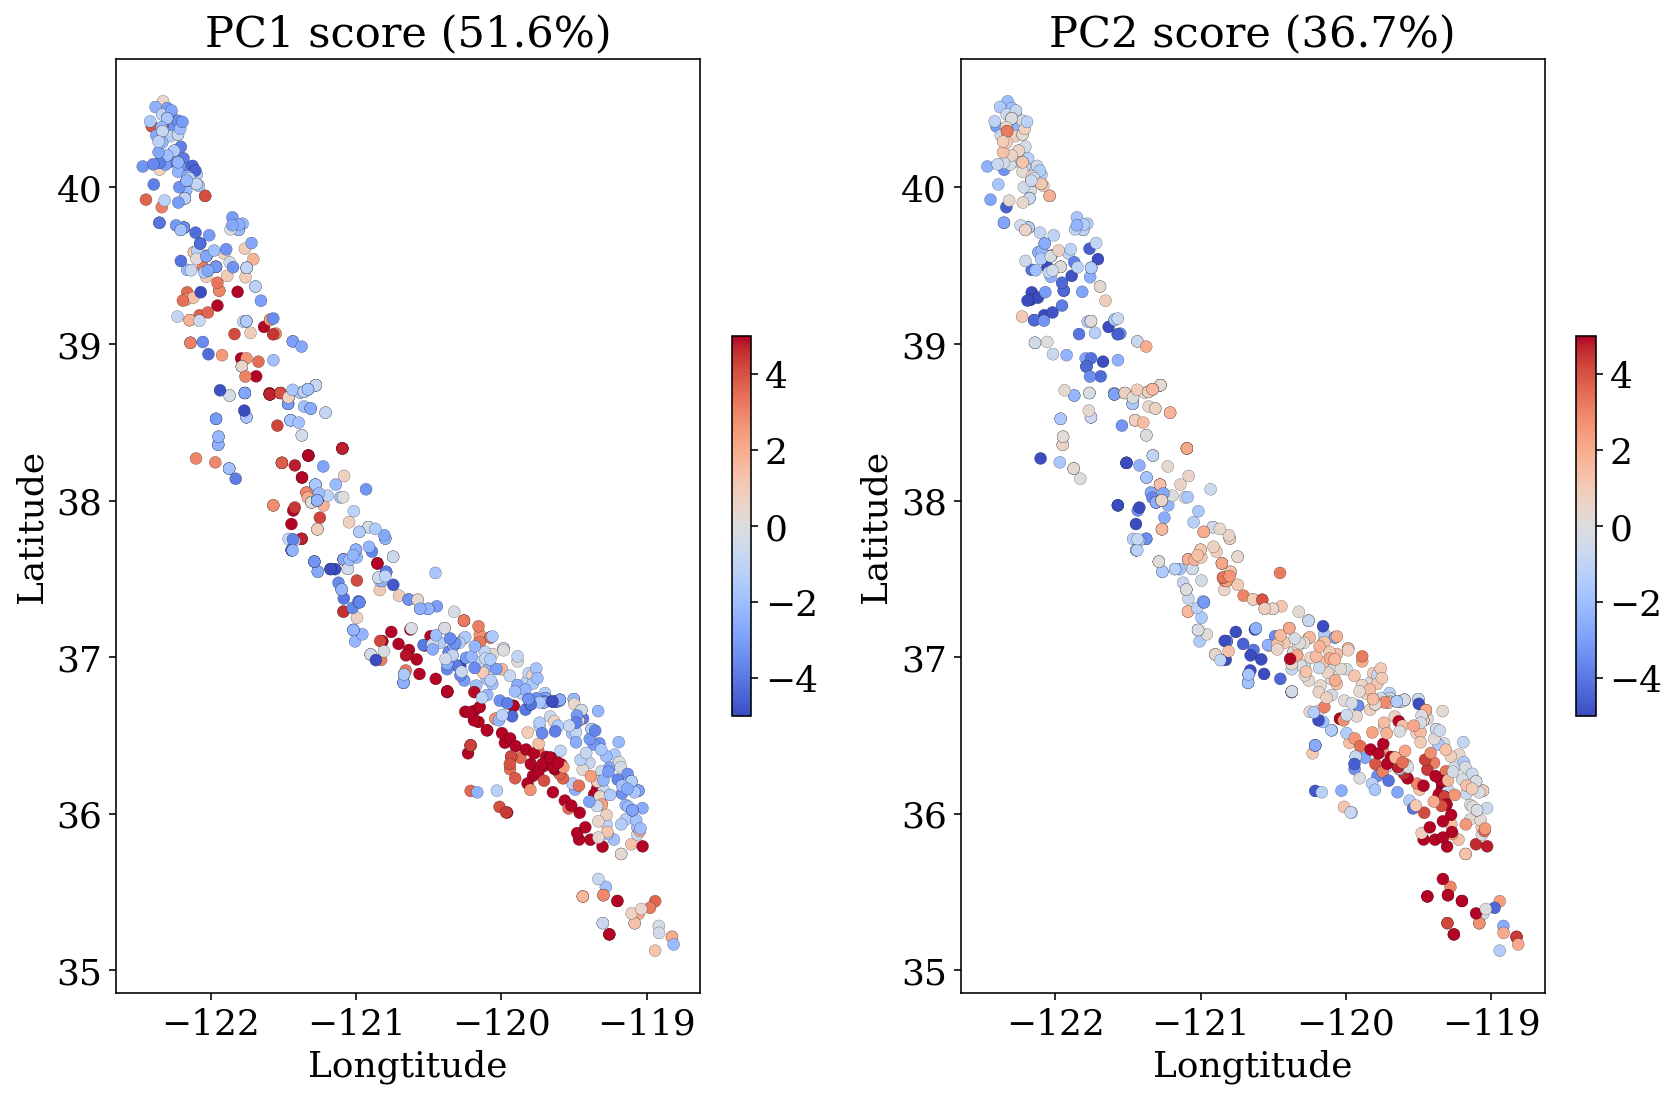

In [12]:
matplotlib.rc("figure", figsize=(12,8))
ax = plt.subplot(1, 2, 1)
plt.scatter(data['Longitude'],data['Latitude'],
            c = X_pc[:,0], cmap = 'coolwarm', vmax=5, vmin=-5, edgecolor='k', linewidth=0.1)
plt.colorbar(fraction=0.03)
plt.title('PC1 score ({:.1f}%)'.format(100*pca.explained_variance_ratio_[0]))

plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
plt.scatter(data['Longitude'],data['Latitude'],
            c = X_pc[:,1], cmap = 'coolwarm', vmax=5, vmin=-5, edgecolor='k', linewidth=0.1)
plt.colorbar(fraction=0.03)
plt.title('PC2 score ({:.1f}%)'.format(100*pca.explained_variance_ratio_[1]))

plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.tight_layout()



# Plot 5: For dimension reduction: error made for each sample

Suppose we just keep two dimensions out of four:

In [13]:
# Reconstruct with PCs, two dimensions
X_rec =  X_pc[:,:2].dot(pca.components_[:2]) + X.mean(axis=0)

In [14]:
# error
epsilon = X-X_rec
abs_epsilon = np.abs(epsilon)
rel_epsilon = abs_epsilon/np.abs(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


## Score plot, PC1 and PC2, colored by relative error

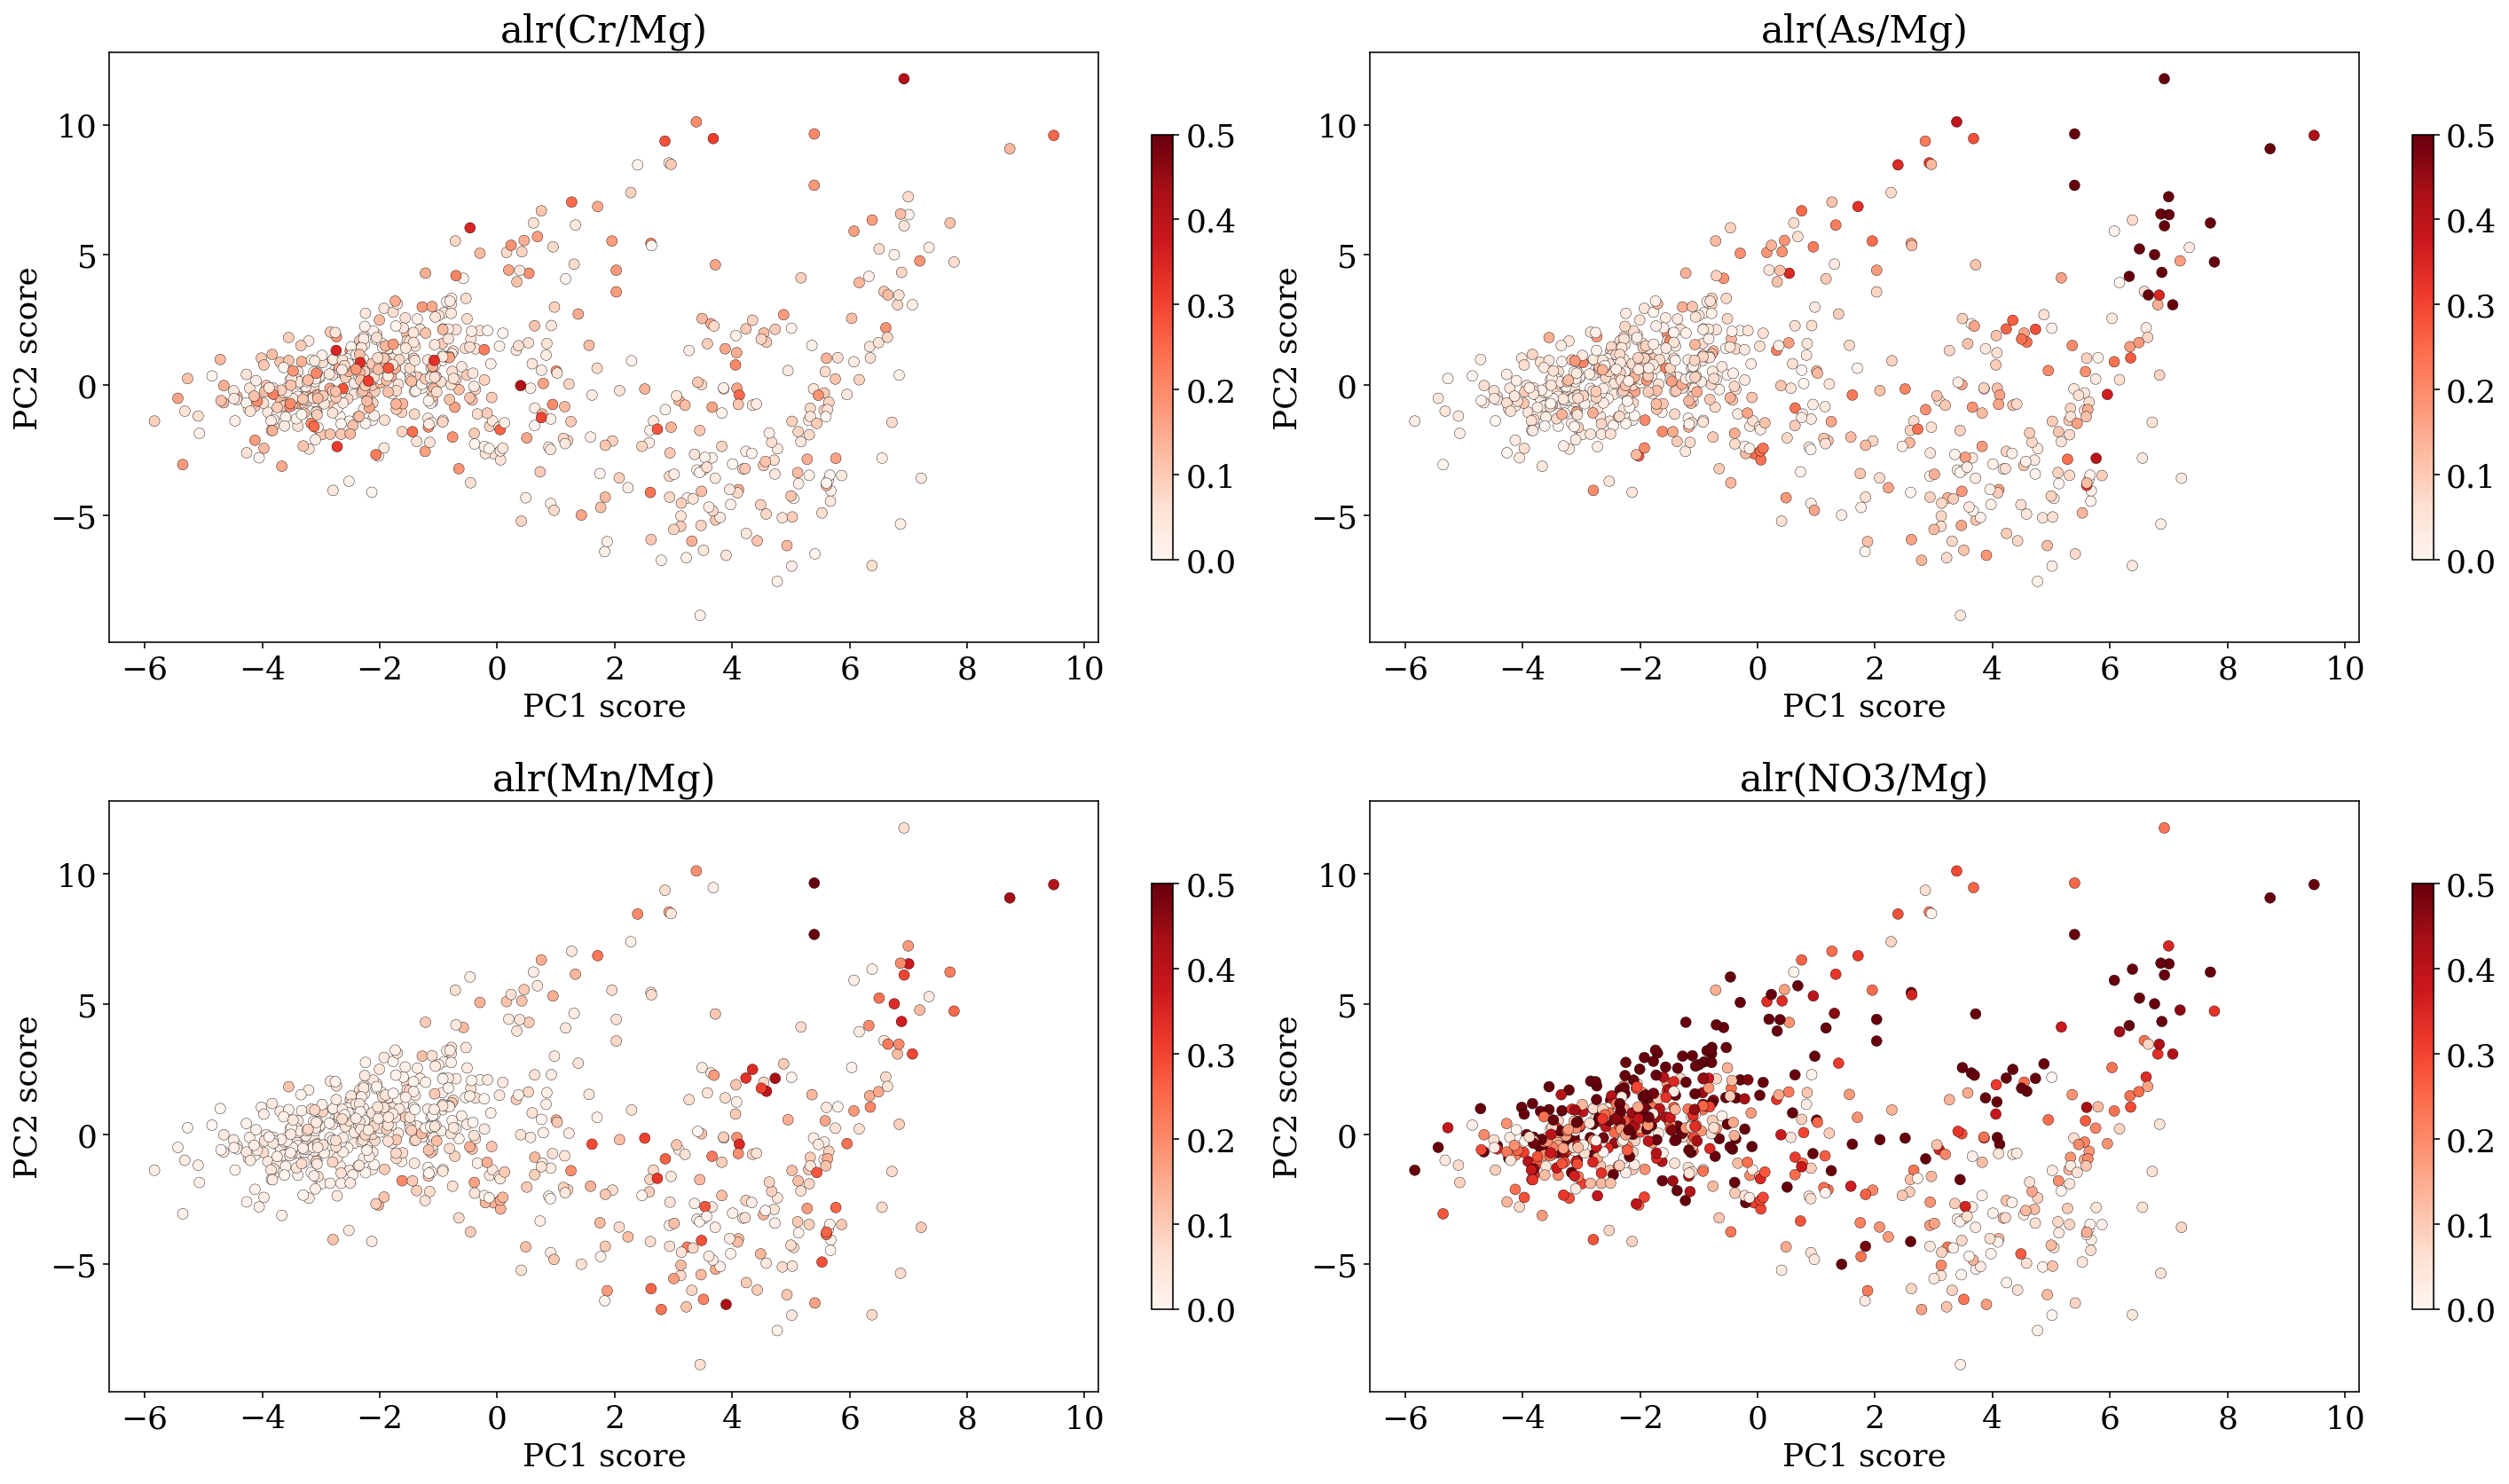

In [15]:
# score plot, PC1 and PC2, colored by relative error

component_index = [0,1]
plt.figure(figsize=(20,12))
for i in range(n_pcs):
  plt.subplot(2, 2, i+1)
  plt.scatter(X_pc[:,component_index[0]], X_pc[:,component_index[1]],  c=rel_epsilon[:,i], 
              cmap = 'Reds', edgecolor='k', linewidth=0.2,vmin = 0, vmax = 0.5)

  plt.colorbar(fraction=0.02)
 
  plt.xlabel('PC'+str(component_index[0]+1)+' score')
  plt.ylabel('PC'+str(component_index[1]+1)+' score')

  plt.title(alr_name[i])
plt.tight_layout()

## Score plot, PC3 and PC4, colored by relative error

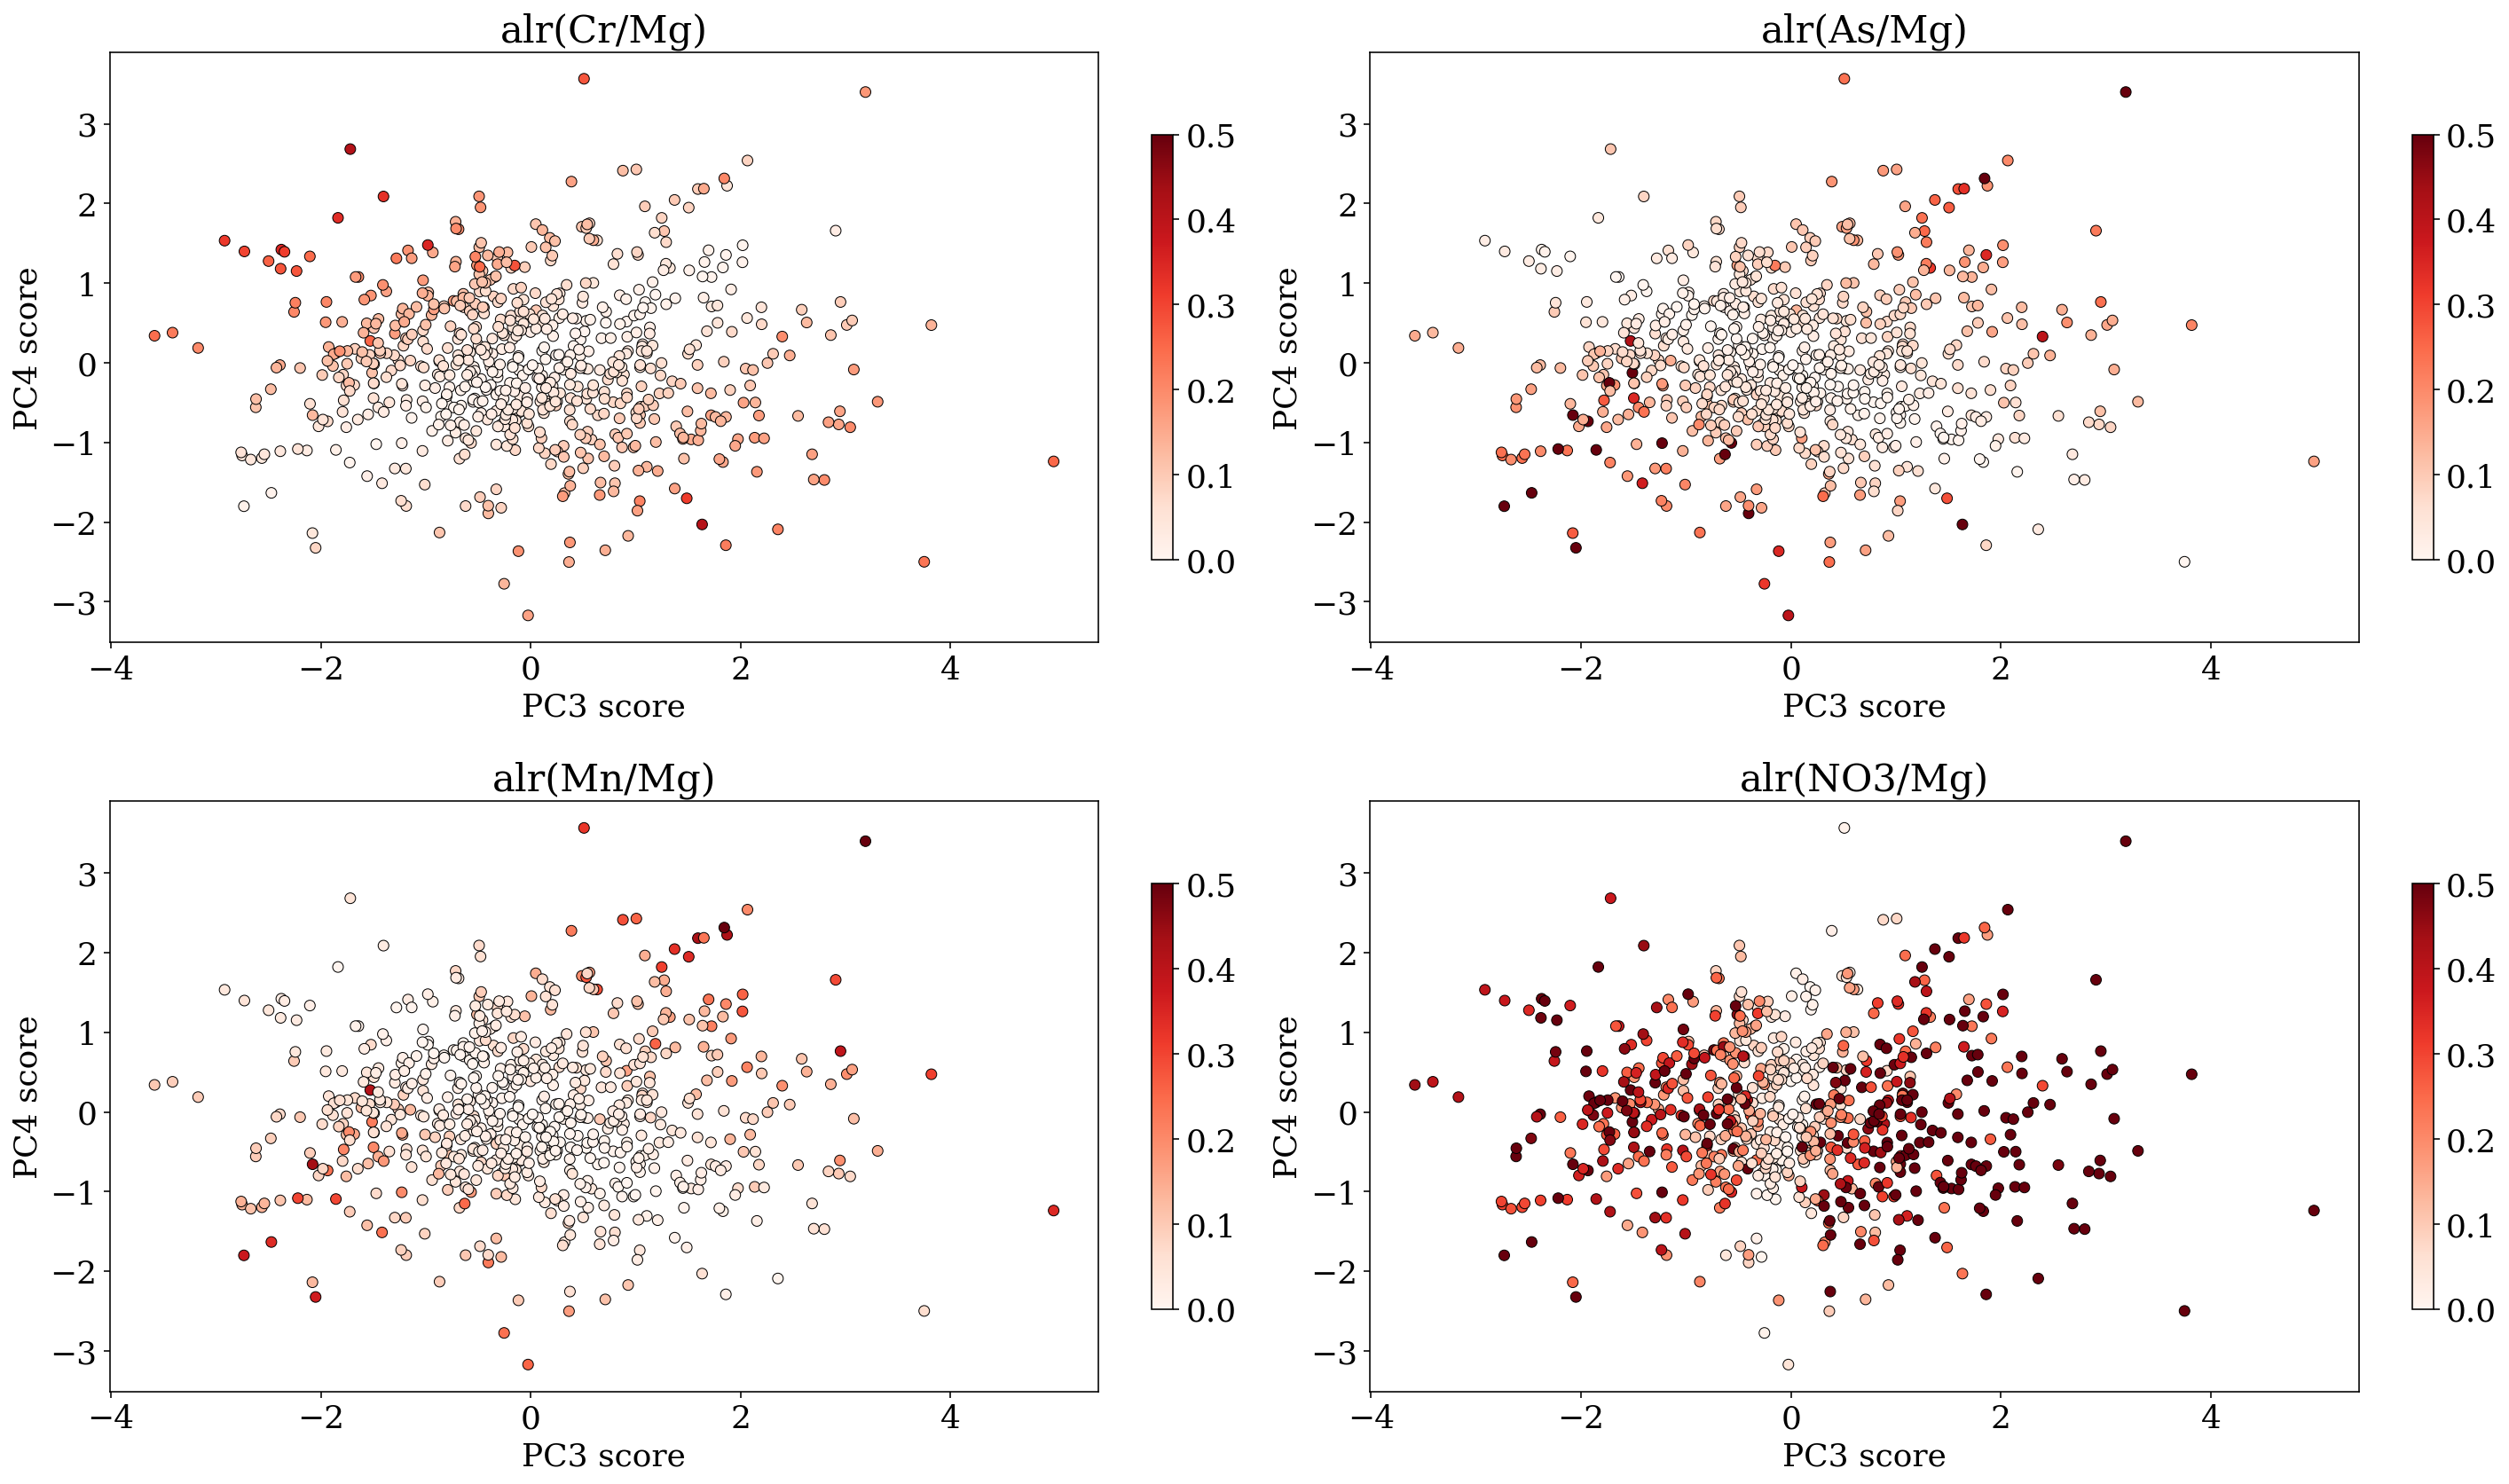

In [16]:
# score plot, PC3 and PC4, colored by relative error

component_index = [2,3]
plt.figure(figsize=(20,12))
for i in range(n_pcs):
  plt.subplot(2, 2, i+1)
  plt.scatter(X_pc[:,component_index[0]], X_pc[:,component_index[1]],  c=rel_epsilon[:,i], 
              cmap = 'Reds', edgecolor='k', linewidth=0.5,vmin = 0, vmax = 0.5)

  plt.colorbar(fraction=0.02)
 
  plt.xlabel('PC'+str(component_index[0]+1)+' score')
  plt.ylabel('PC'+str(component_index[1]+1)+' score')

  plt.title(alr_name[i])
plt.tight_layout()

## Map, colored by relative error

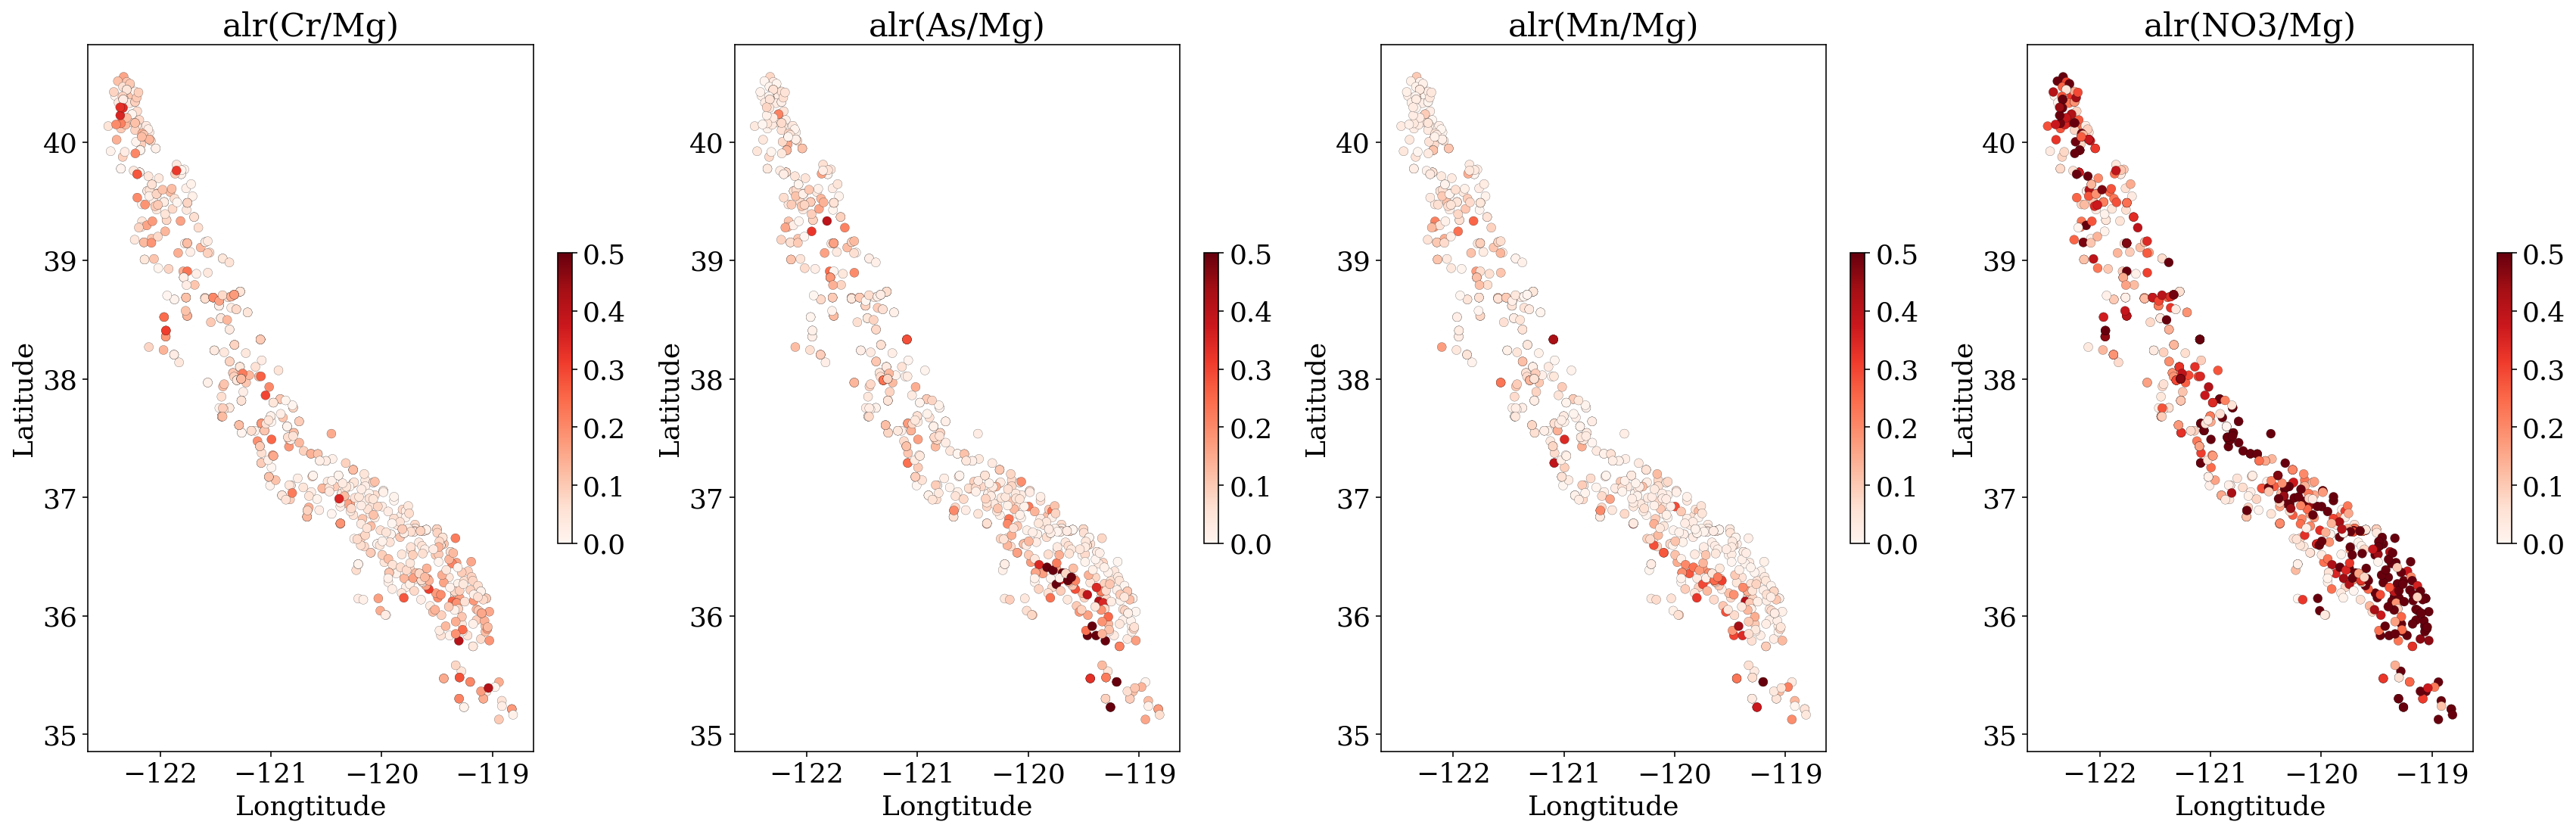

In [17]:
# map, colored by relative error

plt.figure(figsize=(24,8))
for i in range(n_pcs):
    ax = plt.subplot(1, 4, i+1)
    plt.scatter(data['Longitude'],data['Latitude'],
                c = rel_epsilon[:,i], cmap = 'Reds', vmax=0.5, vmin=0, edgecolor='k', linewidth=0.1)
    plt.colorbar(fraction=0.03)
    plt.title(alr_name[i])

    plt.xlabel('Longtitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
